# "Linear Regression Continuation"
> "Mixed Dataset regression"

- toc: true 
- badges: true
- comments: true
- categories: [Part-1 - Linear_Regression]



## Multi-Amino Acid mutants in training set ##

>**What if we incorporate the multi-mutants in the training set - can we catch the epistatic interactions?**

For this, we will created a mixed dataset consisting of 19 point training dataset(9 switched over from the test set) and 19 point test dataset.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr


In [17]:
print(len(x_test))
print(len(x_train))

28
10


In [18]:
#Shifting 9 samples from x_test to x_train
new_x_train = np.append(x_train,x_test[:9],axis = 0)
new_x_test = x_test[9:]

9 samples are shifted from the test dataset into training, leading us to get 19 samples in each. 

In [19]:
print(len(new_x_train))
print(len(new_x_test))

19
19


In [20]:
new_y_train = np.append(y_train,y_test[:9],axis = 0)
new_y_test = y_test[9:]


In [21]:
print(len(new_y_train))
print(len(new_y_test))

19
19


In [22]:
reg = LinearRegression()
reg.fit(new_x_train,new_y_train)

LinearRegression()

**Training Score:**

In [23]:
reg.score(new_x_train,new_y_train)

0.9578724069495184

**Predictions:**

In [24]:
prediction_mixed = reg.predict(new_x_test)
print(prediction_mixed)

[-0.96354673 -1.44197695 -0.96881818 -1.50982586 -1.72405634 -2.26506402
 -1.79190525 -2.27033547 -1.7971767  -2.33818438 -1.42970294 -0.95654417
 -1.49755186 -1.5028233  -1.78490269 -2.25806146 -2.32591037 -2.33118182
 -2.31890781]


**Test Score:**

In [27]:
print(r2_score(new_y_test,prediction_mixed))

0.733971090323416


Pearson Correlation Co-efficient:

In [30]:
corr, _ = pearsonr(new_y_test, prediction_mixed)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.909


<function matplotlib.pyplot.show(close=None, block=None)>

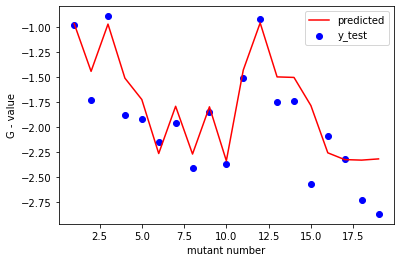

In [31]:
plt.scatter(range(1,20),new_y_test,c = "blue")
plt.plot(range(1,20),prediction_mixed , c="red")
plt.xlabel("mutant number")
plt.ylabel("G - value")
plt.legend(["predicted","y_test"])
plt.show

**The r2 scores seem quite identical when compared to the unmixed dataset Linear Regression Model. But, that probably isn't the best indicator for measuring this model**

Now, lets analyse the epistatic interaction prediction of this mixed model:

In [33]:
results = pd.read_csv("mixed_lr_result.csv")

In [35]:
results

,Actual,Additive,Predictions,Epistatic Prediction
0,-0.98,-1.08,-0.963547,Predicts negative
1,-1.73,-1.62,-1.441977,Doesn’t predict positive
2,-0.89,-0.97,-0.968818,Doesn’t predict negative
3,-1.88,-1.50,-1.509826,Doesn’t predict positive
4,-1.92,-2.17,-1.724056,Predicts negative
5,-2.15,-2.70,-2.265064,Predicts negative
6,-1.96,-2.05,-1.791905,Predicts negative
7,-2.41,-2.59,-2.270335,Predicts negative
8,-1.85,-1.94,-1.797177,Predicts negative
9,-2.37,-2.47,-2.338184,Predicts negative


We can see that though some negative epistatic interactions are getting predicted, none of the postive interactions are. This leads us to explore some other models which might do a better job when it comes to predicting the correct epistatic state.